In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
import sys
%matplotlib widget

from pytransit import QuadraticModel
from pytransit import RoadRunnerModel
from pytransit import QPower2Model

In [2]:
dataset = np.genfromtxt('subset_transits/WASP47_simulated_instrument00.dat', names=True)
dataset.dtype.names

('time', 'flux', 'flux_error', 'jitter', 'offset', 'subset')

In [3]:
sel = (dataset['subset']>-0.5)
submodel_minflag = np.amin(dataset['subset'][sel])
submodel_maxflag = np.amax(dataset['subset'][sel]) + 1

Tc_number = {}
Tc_names = {}

name_ref = 'dataset'
start_flag = int(submodel_minflag)
end_flag = int(submodel_maxflag)




In [4]:
parameter_values = {
'Tc_0':  2.169989,
'Tc_1':  6.329681,
'Tc_2': 10.489333,
'Tc_3': 14.647823,
'Tc_4': 18.805821,
'Tc_5': 22.965076,
'P': 4.159147,
'e': 0.00,
'omega': 90.000000,
'R_Rs': 0.099943,
'b': 0.050445,
'density': 0.744369,
'ld_c1': 0.471754,
'ld_c2': 0.104442,
'a_Rs': 9.859350,
'i': 89.706846
}

In [5]:
t0_list = np.genfromtxt('subset_transits/WASP47_simulated_instrument00_t0list.dat', names=True)
print(t0_list['transit_time'])

submodel_id = dataset['subset']
x =  dataset['time']

subset_flag = np.zeros_like(dataset['time'], dtype=int) -1

Tc_number[name_ref] = []
Tc_names[name_ref] = []

pytransit_models = {}

transit_index = 0
for i_sub in range(start_flag, end_flag):

    par_original = 'Tc'
    par_subset = 'Tc_'+repr(i_sub)

    if np.amin(np.abs(submodel_id-i_sub)) > 0.5: continue

    Tc_names[name_ref].append(par_subset)
    Tc_number[name_ref].append(i_sub)

    subset_flag[(submodel_id == i_sub)] = transit_index
    transit_index += 1

transit_id = np.arange(0, transit_index, dtype=int)




Tc_array = []
#for n_tc in Tc_names[name_ref]:
for n_tc in range(0, transit_index):
    Tc_array.append(t0_list['transit_time'][n_tc])



[ 2.17      6.329151 10.488302 14.647453 18.806604 22.965755]


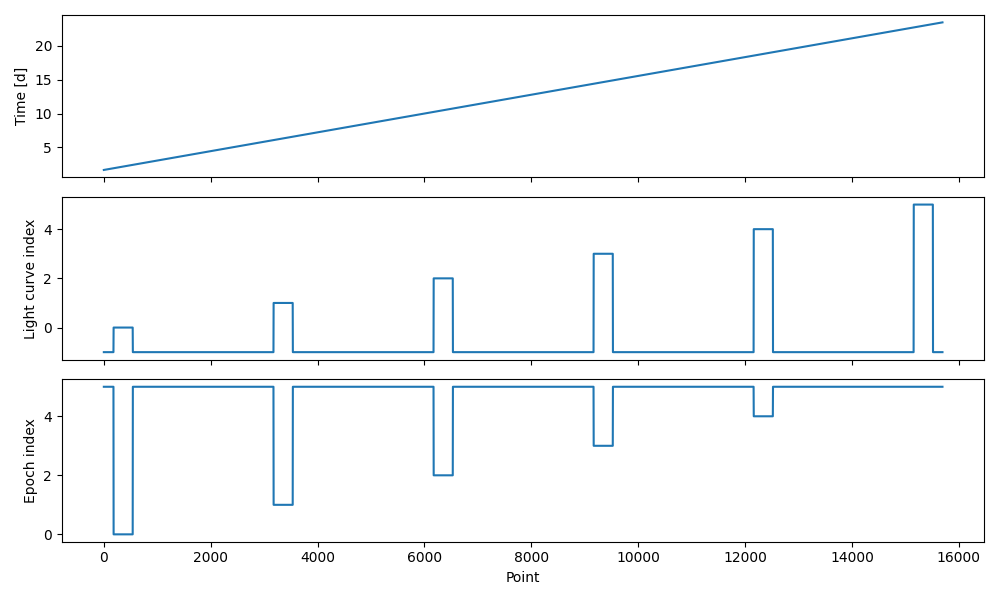

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(10,6), sharex='all')
axs[0].plot(x)
axs[1].plot(subset_flag)
axs[2].plot(transit_id[subset_flag])
plt.setp(axs[0], ylabel='Time [d]')
plt.setp(axs[1], ylabel='Light curve index')
plt.setp(axs[2], ylabel='Epoch index', xlabel='Point')
fig.tight_layout()

In [12]:
pytransit_models = RoadRunnerModel('quadratic')

sel = (subset_flag>=0)

pytransit_models.set_data(x[sel],
        lcids=subset_flag[sel],
        epids=transit_id,
        exptimes=np.asarray([0.02, 0.02, 0.02, 0.02, 0.02, 0.02]),
        nsamples=np.asarray([5, 5 ,5 ,5 ,5 , 5])
        )

y_output = pytransit_models.evaluate(
    parameter_values['R_Rs'],
    [parameter_values['ld_c1'], parameter_values['ld_c2']],
    Tc_array,
    parameter_values['P'],
    parameter_values['a_Rs'],
    parameter_values['i']* np.pi/180.,
    parameter_values['e'],
    parameter_values['omega'] * np.pi/180.) - 1.

y = np.zeros_like(x)
y[sel] = y_output   

In [8]:
pytransit_models = RoadRunnerModel('quadratic')

pytransit_models.set_data(x)

y_nottv = pytransit_models.evaluate(
    parameter_values['R_Rs'],
    [parameter_values['ld_c1'], parameter_values['ld_c2']],
    Tc_array[0],
    parameter_values['P'],
    parameter_values['a_Rs'],
    parameter_values['i']* np.pi/180.,
    parameter_values['e'],
    parameter_values['omega'] * np.pi/180.) - 1.

print(x)
print(Tc_array[0])
print(parameter_values['P'])


[ 1.67      1.671389  1.672778 ... 23.461667 23.463056 23.464444]
2.17
4.159147


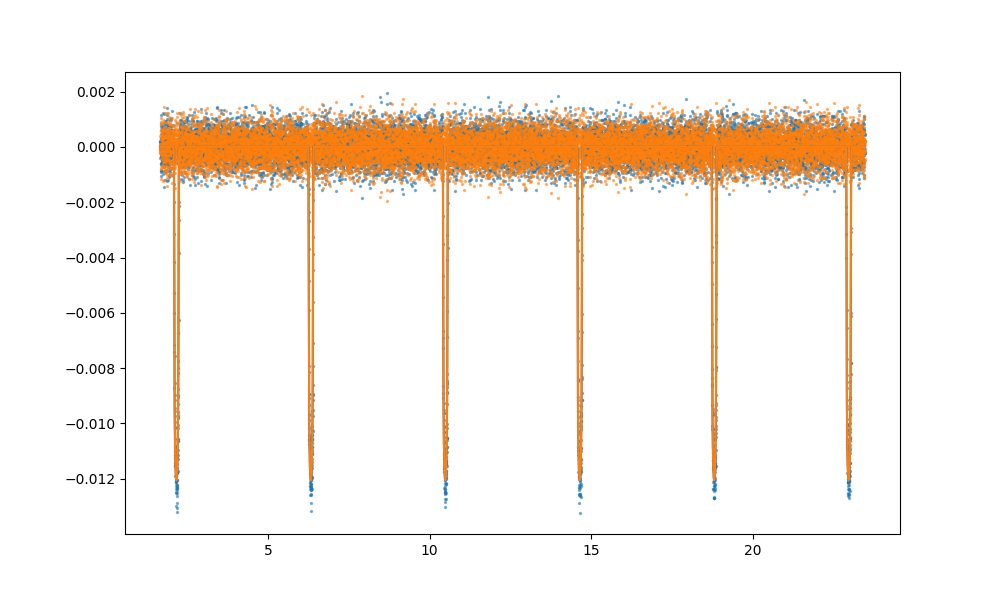

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x, y_nottv)
plt.plot(x, y)
plt.scatter(x, dataset['flux']- 1, s=2, alpha=0.5)
plt.scatter(x, y_nottv - (dataset['flux']- 1), s=2, alpha=0.5)
plt.show()
